In [ ]:
#J(w,b) = 1/m S(i=1 do m)[L{a(i),y(i)}] #cost funkcija

#L{a(i),y(i)} = -[y(i)log(a(i))+(1-y(i))log(1-a(i))] #loss funkcija

#P(y|x)=a^y*(1-a)^(1-y) #uslovna verovatnoca (totalna verovatnoca)

#opadajuci gradijent za jedan uzorak
#dz= a-y
#dw= x*dz
#db= dz
#w:= w - a*dw, "dw"= dL{a,y}/dw= x*(a-y)
#b:= b - a*db, "db"= dL{a,y}/db= a-y

#opadajuci gradijent za m uzoraka (iterativno)
#dz(i)= a(i)-y(i)
#dw(i)= x(i)*dz(i)
#db(i)= dz(i)
#w(i):= w(i) - a(i)*dw(i), "dw(i)"= dL{a(i),y(i)}/dw= x(i)*(a(i)-y(i))
#b(i):= b(i) - a(i)*db(i), "db(i)"= dL{a(i),y(i)}/db= a(i)-y(i)

#opadajuci gradijent za m uzoraka (vektorski)
#dZ= A-Y
#dW= X*dZ
#db= dZ
#W:= W - A*dW
#b:= b - a*db 

In [ ]:
#Opadajuci gradijent za m uzoraka (iterativno) z=w1x1+w2x2+b 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x1=np.vstack([(np.random.randn(1000)+2.4).T,(np.random.randn(1000)+2.4).T])
y1=np.zeros(1000)
x2=np.vstack([np.random.randn(1000).T,np.random.randn(1000).T])
y2=np.ones(1000)

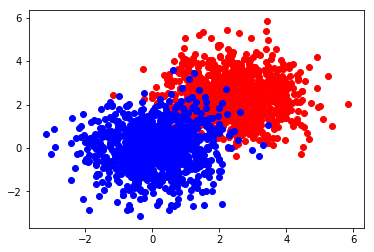

In [5]:
X=np.hstack([x1,x2]).T
y=np.zeros(2000)
y[1000:]=1
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.show()

In [6]:
def sig(z):
    return 1/(1+np.exp(-z))

In [7]:
z= np.zeros(len(X))
a= np.zeros(len(X))#procena
J=0
b=0
w1= 0
w2= 0
dw1=0
dw2=0
db=0
dz=np.zeros(len(X))
alf=0.01
iteracija=10000
m=len(X)

In [8]:
for j in range (0,iteracija):
    for i in range (0,len(X)):
        z[i]=w1*X[i,0]+w2*X[i,1]+b
        a[i]=sig(z[i])#racunanje procene
        J=J-(y[i]*np.log(a[i])+(1-y[i])*np.log(1-a[i]))#racunanje kost fje
        dz[i]=a[i]-y[i]
        dw1+=X[i,0]*dz[i]
        dw2+=X[i,1]*dz[i]
        db+=dz[i]
    dw1=dw1/m
    dw2=dw2/m
    db=db/m
    w1=w1-alf*dw1
    w2=w2-alf*dw2
    b=b-alf*db

In [9]:
x2=(0.5-b)/w2-w1/w2*X[:,0]

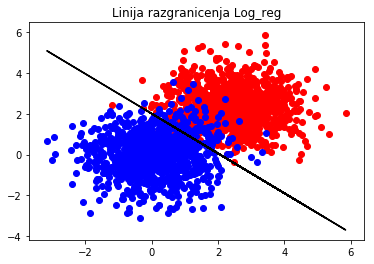

In [55]:
plt.plot(X[:,0],x2,c=u'k')
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg")
plt.show()

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
clf = LinearDiscriminantAnalysis()

In [59]:
klas_LDA = clf.fit(X,y)

In [60]:
#parametri LDA klasifikatora
w11=klas_LDA.coef_[0,0]
w22=klas_LDA.coef_[0,1]
b11=klas_LDA.intercept_

In [61]:
#linija razgranicenja LDA klasifikatora
x3=(0.5-b11)/w22-w11/w22*X[:,0]

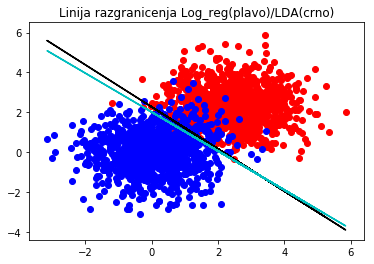

In [63]:
plt.plot(X[:,0],x3,c=u'k')#LDA
plt.plot(X[:,0],x2,c=u'c')#Log_reg_rucno_pisano
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg(plavo)/LDA(crno)")
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
klas_LR = LogisticRegression()

In [66]:
klas_LR.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
w111=klas_LR.coef_[0,0]
w222=klas_LR.coef_[0,1]
b111=klas_LR.intercept_

In [68]:
x4=(0.5-b11)/w22-w11/w22*X[:,0]

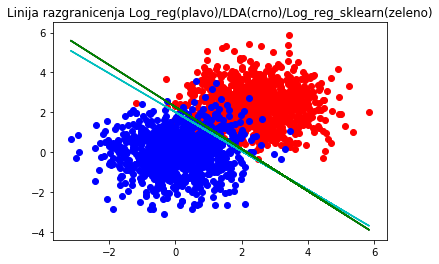

In [70]:
plt.plot(X[:,0],x3,c=u'k')#LDA
plt.plot(X[:,0],x2,c=u'c')#Log_reg_rucno_pisano
plt.plot(X[:,0],x4,c=u'g')#Log_reg_sklearn
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg(plavo)/LDA(crno)/Log_reg_sklearn(zeleno)")
plt.show()

In [71]:
#tacnost log_reg

In [109]:
def proceni_LR(X,w1,w2,b):
        procena = np.round(sig(w1*X[:,0]+w2*X[:,1]+b)) 
        return procena

In [122]:
#test skup
x11=np.vstack([(np.random.randn(1000)+2.4).T,(np.random.randn(1000)+2.4).T])
x22=np.vstack([np.random.randn(1000).T,np.random.randn(1000).T])

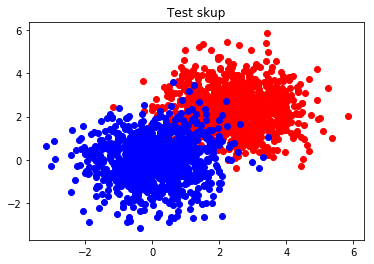

In [123]:
X_test=np.hstack([x11,x22]).T
y_test=np.zeros(2000)
y_test[1000:]=1
plt.title("Test skup")
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.show()

In [124]:
y_procena = proceni_LR(X_test,w1,w2,b)
print("Tacnost:",sum(y_test == y_procena)/len(y_test)*100,"%")

Tacnost: 94.95 %
